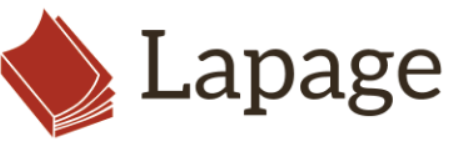

### Première Partie - Importation des librairies et préparation des dataframes

### I. Importation des librairies

In [1]:
# Importons les librairies dont nous auront besoin
import pandas as pd
import numpy as np
import seaborn as sns

### II. Lecture des fichiers et préparation des dataframes

#### II.1.  Lecture des fichiers

#### II.1.1. Customers

In [2]:
# Récupérons notre fichier  dans une variable
customers = pd.read_csv('customers.csv')

#### II.1.2. Products

In [3]:
# Récupérons notre fichier  dans une variable
products = pd.read_csv('products.csv')

#### II.1.3. Transactions

In [4]:
# Récupérons notre fichier dans une variable
transactions = pd.read_csv('transactions.csv')

On dispose de 3 jeux de données : clients, produits et transactions.

### III. Préparation des dataframes

#### III.1 Customers

In [5]:
# Affichons les 5 premières entrées pour avoir un aperçu de notre dataframe
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [6]:
# Affichons le nombre de lignes et de colonnes
customers.shape

(8623, 3)

- La table 'Customers' recense l'identifiant, le sexe et l'année de naissance de 8623 individus (clients).
- 'client_id' est la clé unique

In [7]:
# Vérifions le type de données de notre dataframe
customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [8]:
# Modifions le type de notre colonne
customers['client_id'] = customers['client_id'].astype('string')
customers['client_id'].dtypes

string[python]

In [9]:
# Vérifions les valeurs uniques, ça nous aidera pour le changement de type
customers.sex.unique()

array(['f', 'm'], dtype=object)

La colonne 'sex' n'affiche que 2 modalités : f (féminin) et m (masculin).

In [10]:
# Modifions le type de notre colonne
customers['sex'] = customers['sex'].astype('string')
customers['sex'].dtypes

string[python]

<AxesSubplot:>

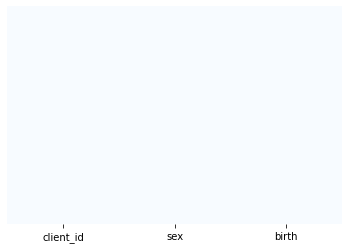

In [11]:
# Affichons les valeurs manquantes sur un graphique
sns.heatmap(customers.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [12]:
# vérifions les valeurs manquantes
customers.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [13]:
# cherchons les doublons du dataframe customers
customers.duplicated().sum()

0

Le dataframe ne contient aucune valeur manquante

In [14]:
# Affichons les valeurs de test du dataframe 'customers'
customers[(customers.client_id=='ct_0')|(customers.client_id=='ct_1')]

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


In [15]:
# Supprimons les valeurs de test du dataframe 'customers'
customers = customers.drop(index = [2735,8494])
customers

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


<AxesSubplot:xlabel='birth'>

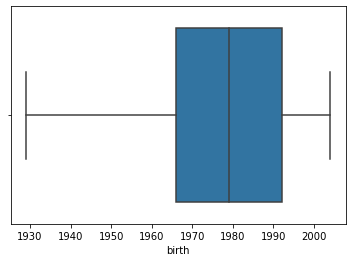

In [16]:
# Creation d'une boite à moustaches pour visualiser les valeurs aberrantes en utilisant seaborn
sns.boxplot(x=customers['birth'])

<AxesSubplot:xlabel='sex', ylabel='birth'>

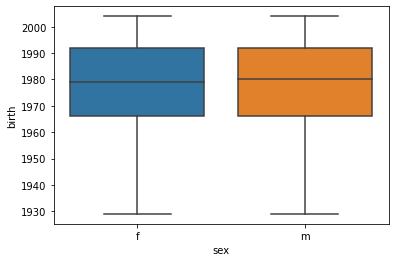

In [17]:
sns.boxplot(x=customers['sex'], y=customers['birth']) 

Le dataframe ne contient aucune valeur aberrante

In [18]:
# Créons une colonne 'age'
customers['age'] = 2022 - customers.birth

<AxesSubplot:>

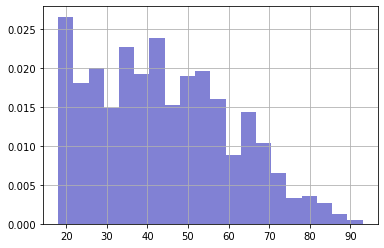

In [19]:
# Affichons l'âge sur un histogramme
customers['age'].hist( color='#0504aa', alpha=0.5, density=True, bins=20)

In [20]:
customers['age'].min()

18

In [21]:
customers['age'].max()

93

L'âge des clients varie de 18 à 93 ans

#### III.2 Products

In [22]:
# Affichons les 5 premières entrées pour avoir un aperçu de notre dataframe
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [23]:
# Affichons le nombre de lignes et de colonnes
products.shape

(3287, 3)

- La table produits détaille l'identifiant, le prix et la catégorie de 3287 livres.
- 'id_prod' est la clé unique

In [24]:
# Vérifions le type de données de notre dataframe
products.dtypes

id_prod     object
price      float64
categ        int64
dtype: object

In [25]:
# Modifions le type de notre colonne
products['id_prod'] = products['id_prod'].astype('string')
products['id_prod'].dtypes

string[python]

<AxesSubplot:>

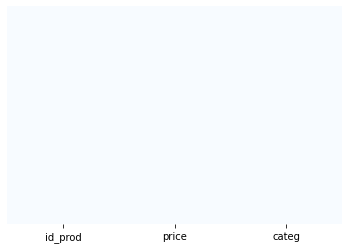

In [26]:
# Affichons les valeurs manquantes sur un graphique
sns.heatmap(products.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [27]:
# vérifions les valeurs manquantes
products.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

Le dataframe ne contient aucune valeur manquante

In [28]:
# cherchons les doublons du dataframe products
products.duplicated().sum()

0

Le dataframe ne contient aucun doublon

<AxesSubplot:xlabel='price'>

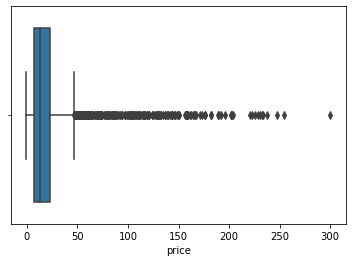

In [29]:
# Creation d'une boite à moustaches pour visualiser les valeurs aberrantes en utilisant seaborn
sns.boxplot(x=products['price'])

<AxesSubplot:xlabel='categ', ylabel='price'>

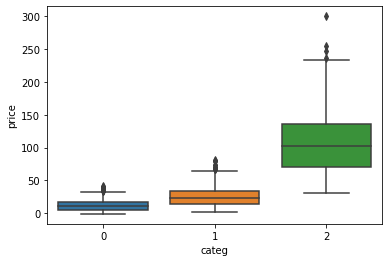

In [30]:
sns.boxplot(x=products['categ'], y=products['price']) 

In [31]:
# Calculons l'intervalle interquartile et le coefficient auxquels on appliquera les limites 
Q1 = products['price'].quantile(0.25)
Q3 = products['price'].quantile(0.75)
IQR = Q3 - Q1
coef = IQR * 1.5

In [32]:
# fixons les limites pour voir à quelle distance les valeurs debordent des deux côtés
lim_inf = Q1 - coef
lim_sup = Q3 + coef

In [33]:
# cherchons les outliers
outliers = products[(products['price'] > lim_sup) | (products['price'] < lim_inf)]
outliers

,id_prod,price,categ
10,2_228,225.17,2
11,1_178,51.92,1
38,2_100,72.11,2
49,1_48,47.22,1
64,2_89,107.99,2
...,...,...,...
3267,2_101,63.99,2
3269,1_543,51.99,1
3271,2_123,147.99,2
3279,1_331,55.99,1


In [34]:
# Trions les valeurs aberrantes des prix du plus élevé au moins élevé
outliers['price'].sort_values(ascending=False)

947     300.00
724     254.44
394     247.22
1436    236.99
2779    233.54
         ...  
3169     47.35
2966     47.30
49       47.22
2266     46.99
1164     46.99
Name: price, Length: 302, dtype: float64

- Certains prix des livres de la categorie 2 se detachent par rapport aux autres
- Ils sont très élevés comme le montre le diagramme à moustaches

In [35]:
# Affichons les valeurs de test du dataframe 'products'
products[(products.id_prod=='T_0')]

,id_prod,price,categ
731,T_0,-1.0,0


La ligne  avec le prix négatif est la ligne 731, nous allons maintenant la supprimer

In [36]:
# Supprimons les valeurs de test du dataframe 'products'
products.drop(731,0,inplace=True)

C:\Users\moust\AppData\Local\Temp/ipykernel_15864/3243623727.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  products.drop(731,0,inplace=True)


In [37]:
# vérifions le nombre de lignes apres supression du prix négatif
len(products)

3286

Après suppression, on passe de 3287 livres à 3286 livres

#### III.3 Transactions

In [38]:
# Affichons les 5 premières entrées pour avoir un aperçu de notre dataframe
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


La table des transactions détaille la date et les identifiants de la session, du client et du produit vendu.

In [39]:
# Affichons le nombre de lignes et de colonnes
transactions.shape

(679532, 4)

In [40]:
# Vérifions le type de données de notre dataframe
transactions.dtypes

id_prod       object
date          object
session_id    object
client_id     object
dtype: object

In [41]:
# Modifions le type de notre colonne
transactions['id_prod'] = transactions['id_prod'].astype('string')
transactions['session_id'] = transactions['session_id'].astype('string')
transactions['client_id'] = transactions['client_id'].astype('string')
transactions['id_prod'].dtypes
transactions['session_id'].dtypes
transactions['client_id'].dtypes

string[python]

<AxesSubplot:>

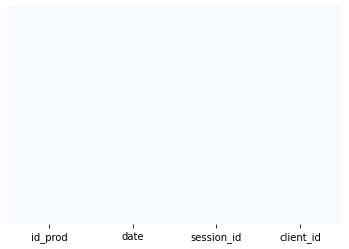

In [42]:
# Affichons les valeurs manquantes sur un graphique
sns.heatmap(transactions.isnull(),yticklabels=False, cbar=False, cmap='Blues')

In [43]:
# Vérifions les valeurs manquantes
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

Le dataframe ne contient aucune valeur manquante

In [44]:
# Cherchons les doublons du dataframe 
transactions.duplicated().sum()

126

In [45]:
# affichons les doublons
transactions[transactions.duplicated()]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Nous avons 126 données dupliquées dans le fichier transactions. Pour les enlever nous allons utiliser drop_duplicates

In [46]:
# Supprimons les doublons de notre dataframe
transactions = transactions.drop_duplicates()
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [47]:
# Affichons les valeurs de test du dataframe 'transactions'
transactions[transactions['session_id']=='s_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
577324,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_0
593065,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_1
607892,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_0
626049,T_0,test_2021-03-01 02:30:02.237422,s_0,ct_0


In [48]:
# Affichons le dataframe transactions sans les test qui possèdent l'identifiant 's_0'
transactions=transactions[transactions['session_id']!='s_0']
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [49]:
# Vérifions la taille apres la suppression des valeurs test
len(transactions)

679332

Après filtrage, on passe de 679406 livres à 679332 lignes

### IV. Conversion des dataframes en csv

In [50]:
# convertissons le dataframe en csv
customers.to_csv('customers_clean.csv',index=False)

In [51]:
# convertissons le dataframe en csv
transactions.to_csv('transactions_clean.csv',index=False)

In [52]:
# convertissons le dataframe en csv
products.to_csv('products_clean.csv',index=False)